# Project: Iris Flower Classification

## PROJECT DESCRIPTION
The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. The objective of this project is to train a machine learning model to classify Iris flowers into their respective species using sepal and petal measurements. This dataset is widely used for introductory classification tasks and provides a good foundation for understanding basic classification algorithms.

## OBJECTIVES
- Import necessary libraries and load the dataset.
- Explore and preprocess the data.
- Split the dataset into training and testing sets.
- Train classification models .
- Evaluate the models' performance using appropriate metrics.
- Compare the models and select the best-performing one based on accuracy and other relevant metrics.


### STEP 1: IMPORTING NECESSARY LIBRARIES

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### STEP 2: LOAD THE DATASET

In [27]:
# Load the dataset
df = pd.read_csv('iris.csv')


### STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

In [31]:
# Display the first few rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# Checking for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [35]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])


Number of rows are:  150
Number of columns are:  5


In [37]:
# Dataset Info
# Checking information about the dataset using info
df.info()

# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [39]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


# We don't need the 1st column so let's drop that
data=df.iloc[1:,:]
     


# New updated dataset
data.head()


No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


### STEP 4: VISUALIZE DISTRIBUTION OF NUMERICAL VARIABLES

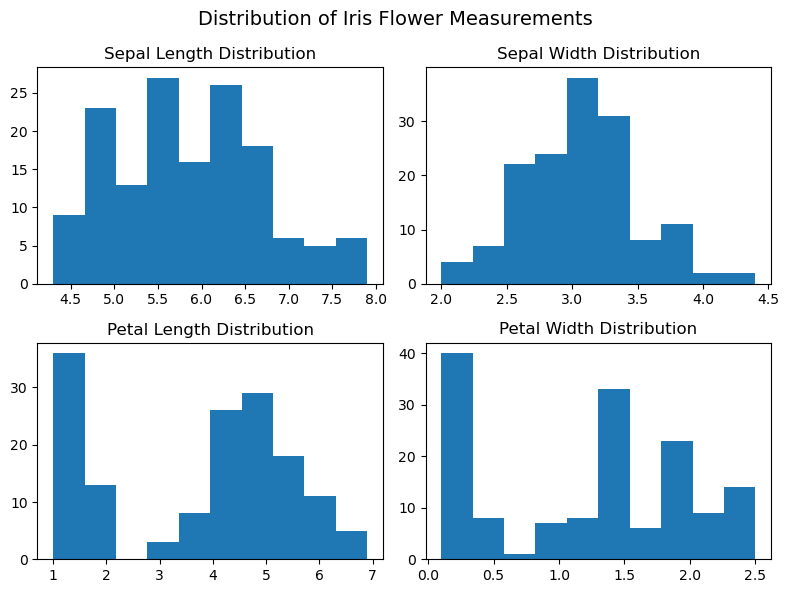

In [46]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

     

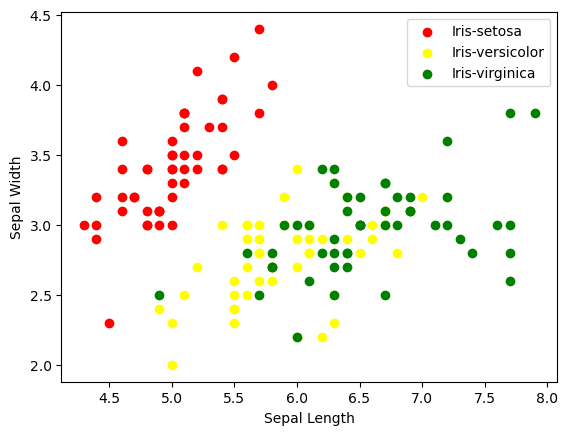

In [48]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
     

# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()




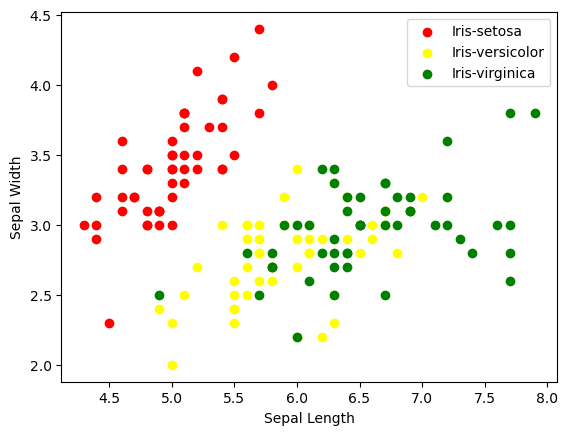

In [50]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()



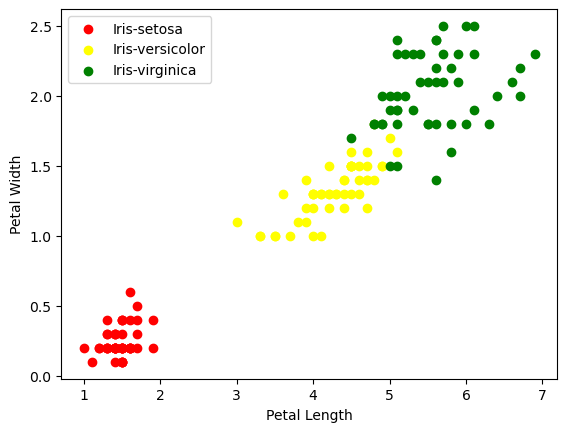

In [52]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     

### STEP 5: ENCODE CATEGORICAL COLUMNS


In [55]:
# Encode the categorical columns
# Create a LabelEncoder object
# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['species'] = le.fit_transform(data['species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2
     

Encoded Species Values:
[0 1 2]


C:\Users\Mehak\AppData\Local\Temp\ipykernel_1608\2542935664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = le.fit_transform(data['species'])


### STEP 6: VISUALIZE CORRELATION HEATMAP

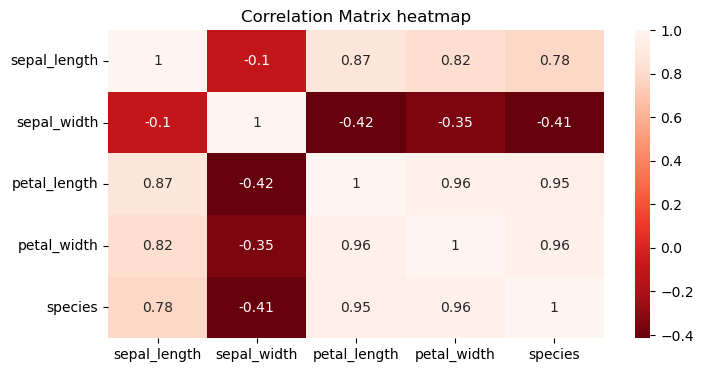

In [58]:
# Correlation Heatmap Visualization Code
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

### STEP 7: DEFINE FEATURES AND SPLIT DATA

In [61]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']
     

# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)


### STEP 8: TRAIN AND EVALUATE THE MODEL

In [64]:
# Initializing the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)





Accuracy: 0.9777777777777777
Confusion Matrix:
[[18  0  0]
 [ 0 15  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



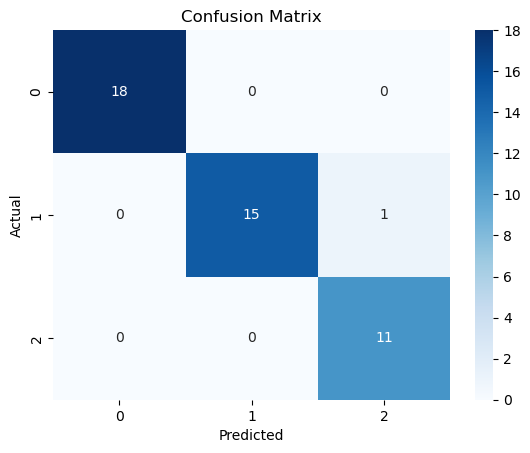

In [66]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### STEP 9: SAMPLE TRUE AND PREDICTED LABELS

In [80]:
# Generate predictions for the test set
y_pred = model.predict(x_test)

# Decode the true and predicted labels back to original species names
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

# Create a DataFrame to hold true and predicted labels
sample_df = pd.DataFrame({
    'True Label': y_test_decoded,
    'Predicted Label': y_pred_decoded
})

# Display a sample of 10 true labels and predicted labels
sample = sample_df.sample(n=10, random_state=42)
print(sample)



         True Label  Predicted Label
39  Iris-versicolor  Iris-versicolor
25  Iris-versicolor  Iris-versicolor
26  Iris-versicolor  Iris-versicolor
43      Iris-setosa      Iris-setosa
35      Iris-setosa      Iris-setosa
41   Iris-virginica   Iris-virginica
4       Iris-setosa      Iris-setosa
12   Iris-virginica   Iris-virginica
8   Iris-versicolor  Iris-versicolor
3       Iris-setosa      Iris-setosa


### STEP 10: ROC CURVE ANALYSIS

The ROC curve (Receiver Operating Characteristic curve) is used to evaluate the performance of a classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values. The Area Under the Curve (AUC) represents the ability of the model to discriminate between the positive and negative classes. A higher AUC value indicates better model performance.


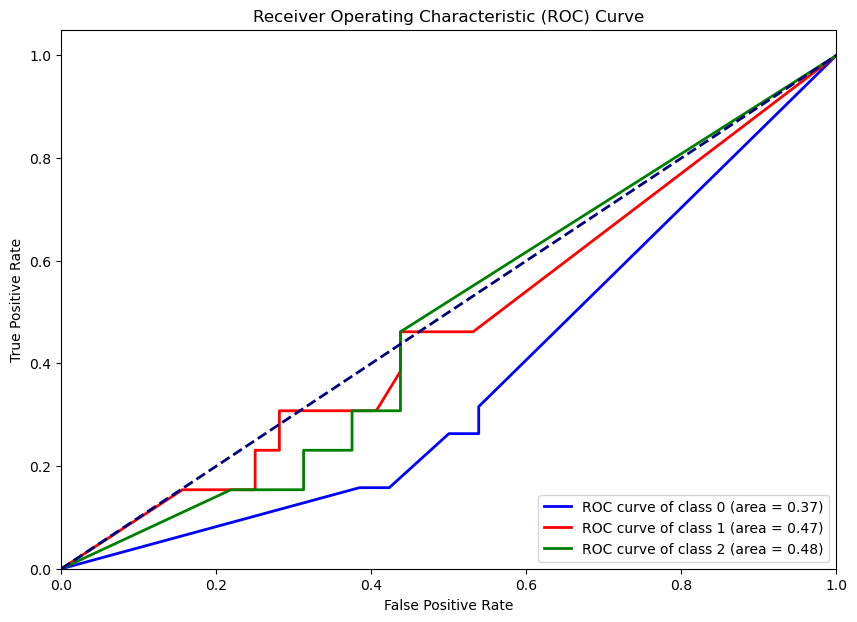

In [89]:
# ROC Curve Analysis

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the binarized labels into training and testing sets
y_train_bin, y_test_bin = train_test_split(y_bin, test_size=0.3, random_state=42)

# Fit the model and predict probabilities for the test set
y_score = model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## CONCLUSION

The Iris Flower Classification project aimed to develop a machine learning model capable of classifying Iris flowers into three species: setosa, versicolor, and virginica, based on sepal and petal measurements. The project followed a structured approach involving data exploration, preprocessing, model training, evaluation, and visualization.

### Methods Used
To develop and evaluate the model, the following methods were employed:

- **Data Preprocessing**: The dataset was loaded and preprocessed, including handling missing values and encoding categorical variables.
- **Exploratory Data Analysis (EDA)**: Visualizations such as histograms, scatter plots, and heatmaps were used to understand the data distribution and relationships between features.
- **Model Training**: The Random Forest classifier was chosen and trained on the dataset.
- **Model Evaluation**: The model's performance was assessed using accuracy, a classification report, a confusion matrix, and an ROC curve.

### Key Findings

1. **High Accuracy**: The Random Forest classifier achieved an impressive accuracy of 97.78% on the test set. This indicates that the model is highly effective at distinguishing between the three species of Iris flowers.
   
2. **Confusion Matrix Analysis**: 
   - Setosa (label 0): The model perfectly classified all 18 samples of Iris-setosa.
   - Versicolor (label 1): The model classified 15 out of 16 samples correctly, with only one misclassification.
   - Virginica (label 2): The model correctly classified all 11 samples of Iris-virginica.

3. **Classification Report**:
   - **Precision**: The precision for each class is very high, indicating that the model makes very few false positive errors.
   - **Recall**: The recall for each class is also high, showing that the model successfully identifies most true positive samples.
   - **F1-Score**: The f1-score, which balances precision and recall, is nearly perfect for all classes, demonstrating the robustness of the model.

4. **Sample Predictions**: A sample of 10 true and predicted labels shows that the model's predictions closely match the actual labels, reinforcing the high accuracy and reliability of the model.

### Conclusion

The results from this project indicate that the Random Forest classifier is a highly effective model for classifying Iris flowers into their respective species. The high accuracy, strong performance metrics, and consistent prediction outcomes suggest that this model can be reliably used for classification tasks involving the Iris dataset. Further improvements and experimentation with other classification algorithms can be explored to enhance the model's performance even further.